In [25]:
import pandas as pd
import numpy as np

# Load dataset
data_path = "../data/raw/household_power_consumption.txt"  # Adjust filename accordingly
df = pd.read_csv(data_path, delimiter = ';', na_values="?", low_memory=False)

# Preview data
df.head()
# df.info()
# df.describe()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [26]:
df.to_csv("../data/processed/data.csv", index=False)

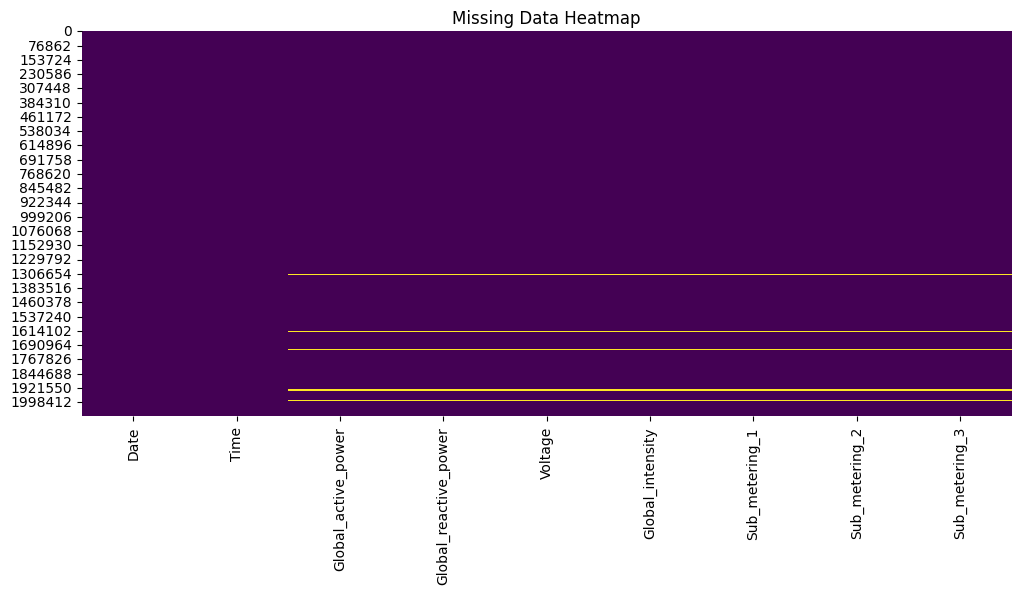

/var/folders/r3/_jjl_yq15117ql_xrk28g0tw0000gn/T/ipykernel_55847/1631790411.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method="linear", inplace=True)


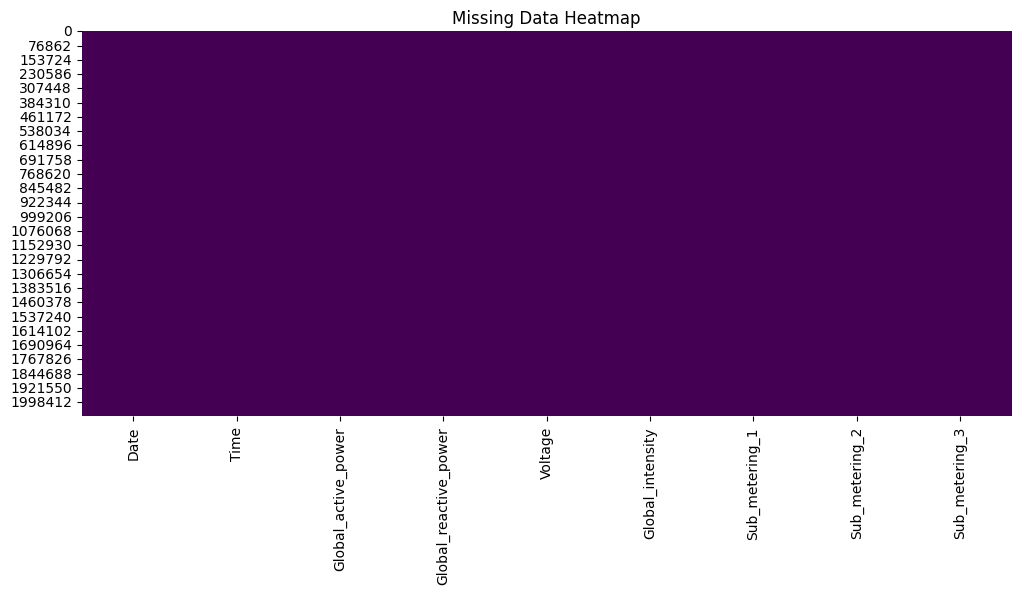

In [27]:
# Identify missing values
df.isnull().sum()

# Plot missing data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

df.interpolate(method="linear", inplace=True)

plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [31]:
# Convert Date and Time columns to datetime format
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Set datetime as index
df.set_index('datetime', inplace=True)

# Drop original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

df.head()

KeyError: 'Date'

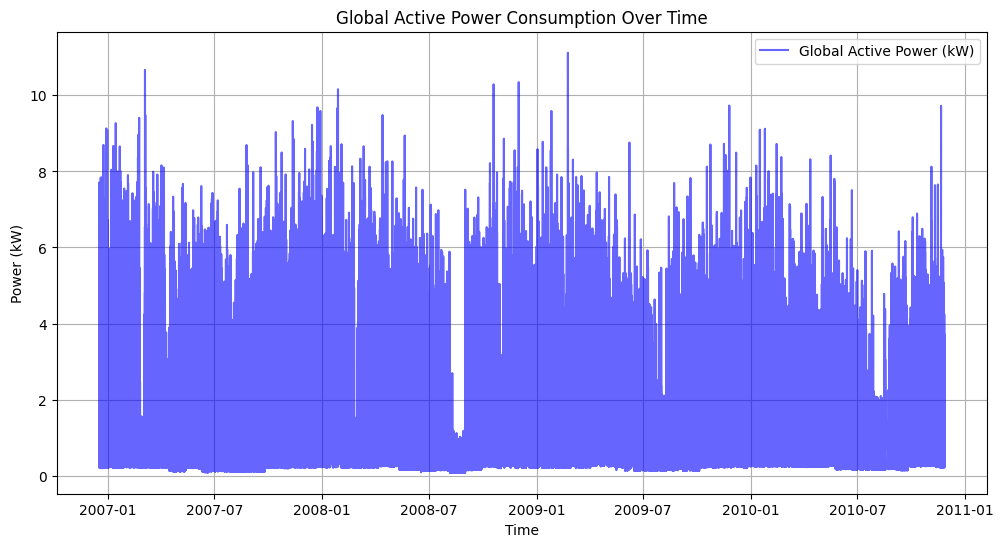

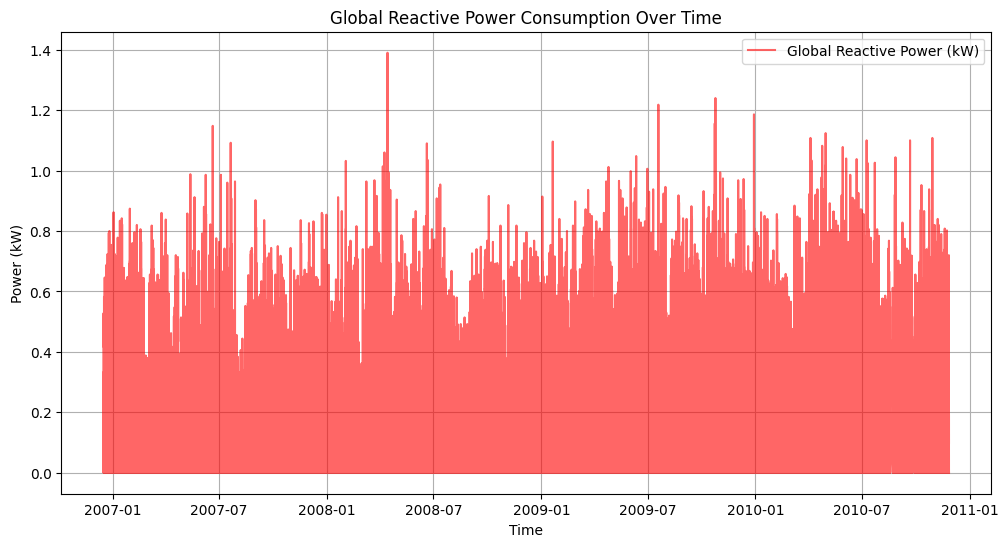

In [33]:
# Visualize Energy Consumption Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power (kW)', color='b', alpha=0.6)
plt.title('Global Active Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_reactive_power'], label='Global Reactive Power (kW)', color='r', alpha=0.6)
plt.title('Global Reactive Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid()
plt.show()

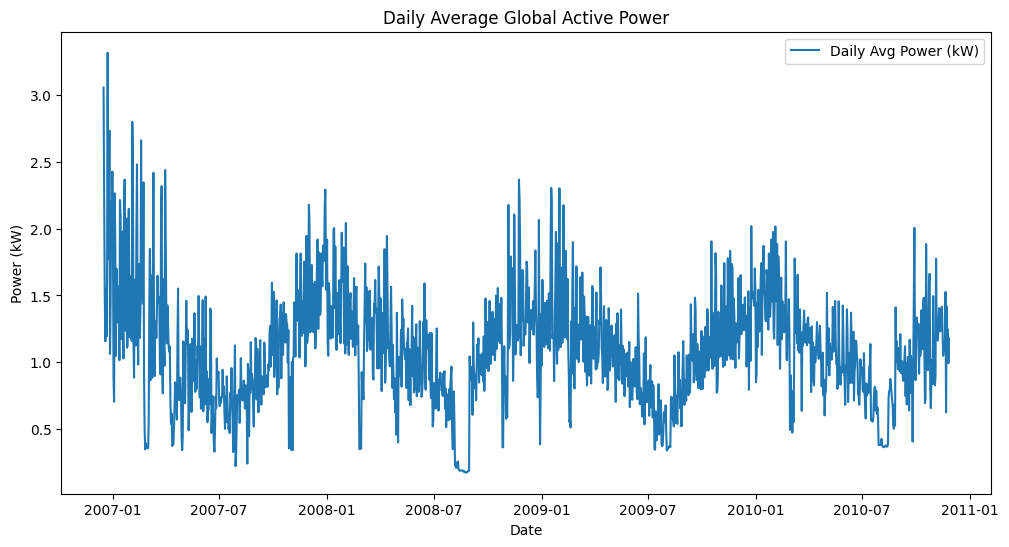

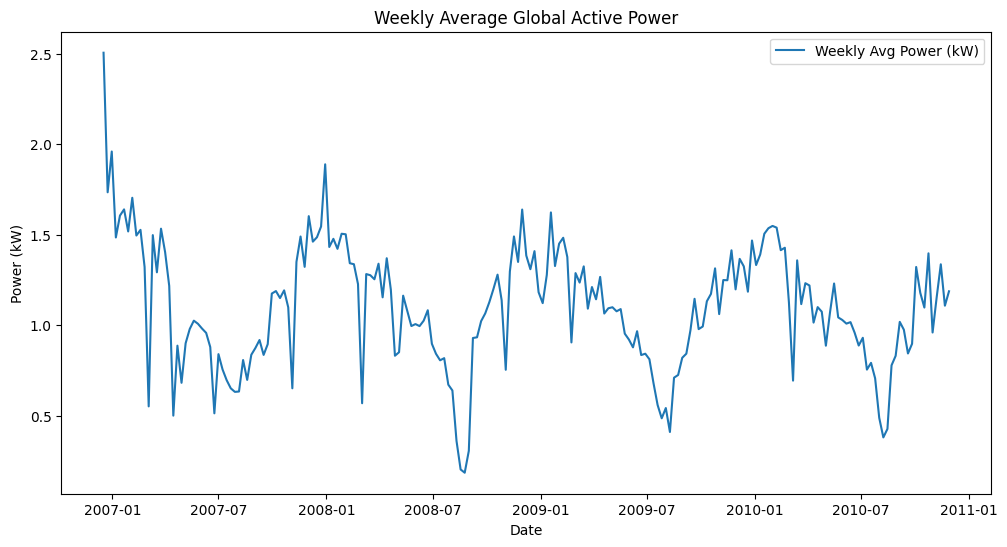

In [35]:
# Explore Trends & Seasonality
#Daily Trends (Average Energy Consumption Per Day)
df_daily = df.resample('D').mean()

plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily['Global_active_power'], label="Daily Avg Power (kW)")
plt.title('Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

# Weekly Trends (Average Energy Consumption Per Week)
df_weekly = df.resample('W').mean()

plt.figure(figsize=(12,6))
plt.plot(df_weekly.index, df_weekly['Global_active_power'], label="Weekly Avg Power (kW)")
plt.title('Weekly Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

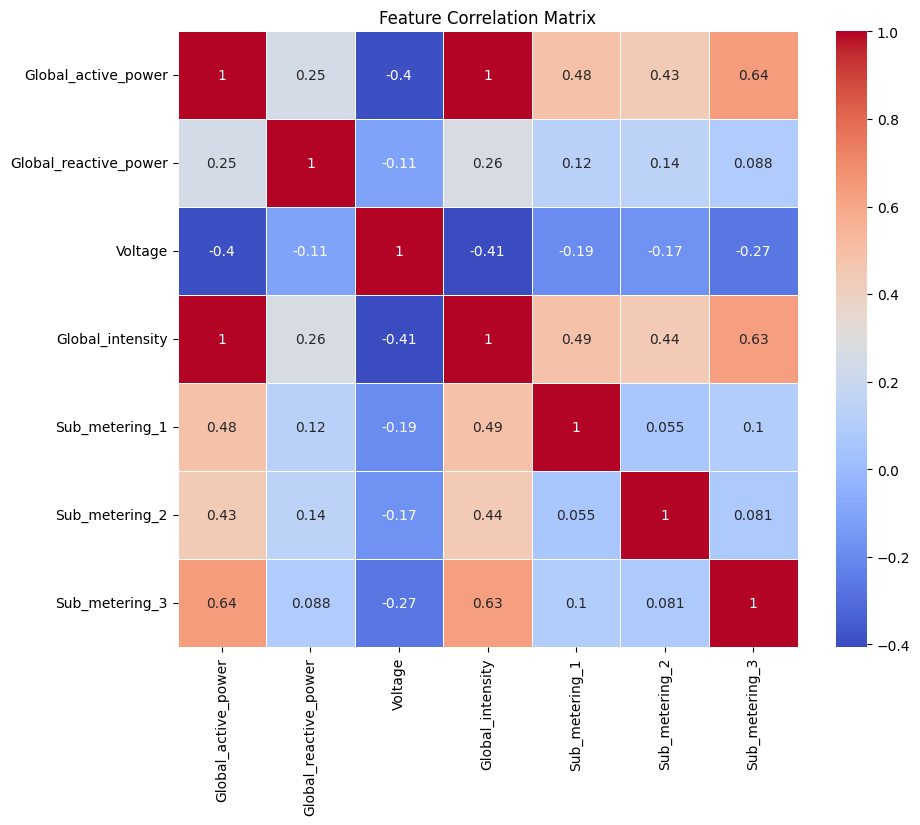

In [36]:
# Correlation Analysis
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()